# YOLOv26 NO MASK AREA (COVER LOWER NAKED FACE) FOR GENERATE MASK AREA

This snipped of codes are adapted from YOLO documentation. You may check the detail by this link: 
https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!uv pip install ultralytics
!pip install roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/112.6 GB disk)


This datasets and annotations were taken from **Kaggle - Celebrity Face Image Datasets (https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset)**. 

All of annotations were made using Roboflow followed by data augmentation with this configuration; image resizing to 320x320 px, image multiplied three times for training datasets, applying horizontal flip, and added 0.05% noise. 

The data annotations consist of 2 labels; *face_nomask* and *nomask_area*. Only *nomask_area* label that will be used for this experiment.

In [ ]:
!mkdir {HOME}/maskclassification
%cd {HOME}/maskclassification



from roboflow import Roboflow
rf = Roboflow(api_key="o1qohGkkoRNbFNSkLjXh")
project = rf.workspace("ihsanroboflownew").project("face-mask-detection-13ygd")
version = project.version(2)
dataset = version.download("yolo26")
                

Training

In [ ]:
!yolo train model=yolo26s.pt data="/content/maskclassification/data.yaml" epochs=100 patience=15 imgsz=320 plots=True

In [ ]:
!ls ./runs/detect/train4/weights


best.pt  last.pt


In [ ]:
!cp ./runs/detect/train4/weights/best.pt ./nomaskarea.pt


In [ ]:
!yolo task=detect mode=val model="./nomaskarea.pt" data="./face-mask-detection-2/data.yaml" split=test

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 725.1±235.8 MB/s, size: 14.3 KB)
val: Scanning /content/nomaskarea/face-mask-detection-2/test/labels... 13 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 13/13 1.6Kit/s 0.0s
val: New cache created: /content/nomaskarea/face-mask-detection-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.0it/s 0.2s
                   all         13         13          1      0.909      0.979      0.731
Speed: 0.4ms preprocess, 4.9ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /content/nomaskarea/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model="./nomaskarea.pt" data="./face-mask-detection-2/data.yaml"

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 677.5±242.7 MB/s, size: 12.1 KB)
val: Scanning /content/nomaskarea/face-mask-detection-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 38/38 7.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 2.2it/s 1.4s
                   all         38         38          1          1      0.995      0.776
Speed: 2.4ms preprocess, 16.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/nomaskarea/runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


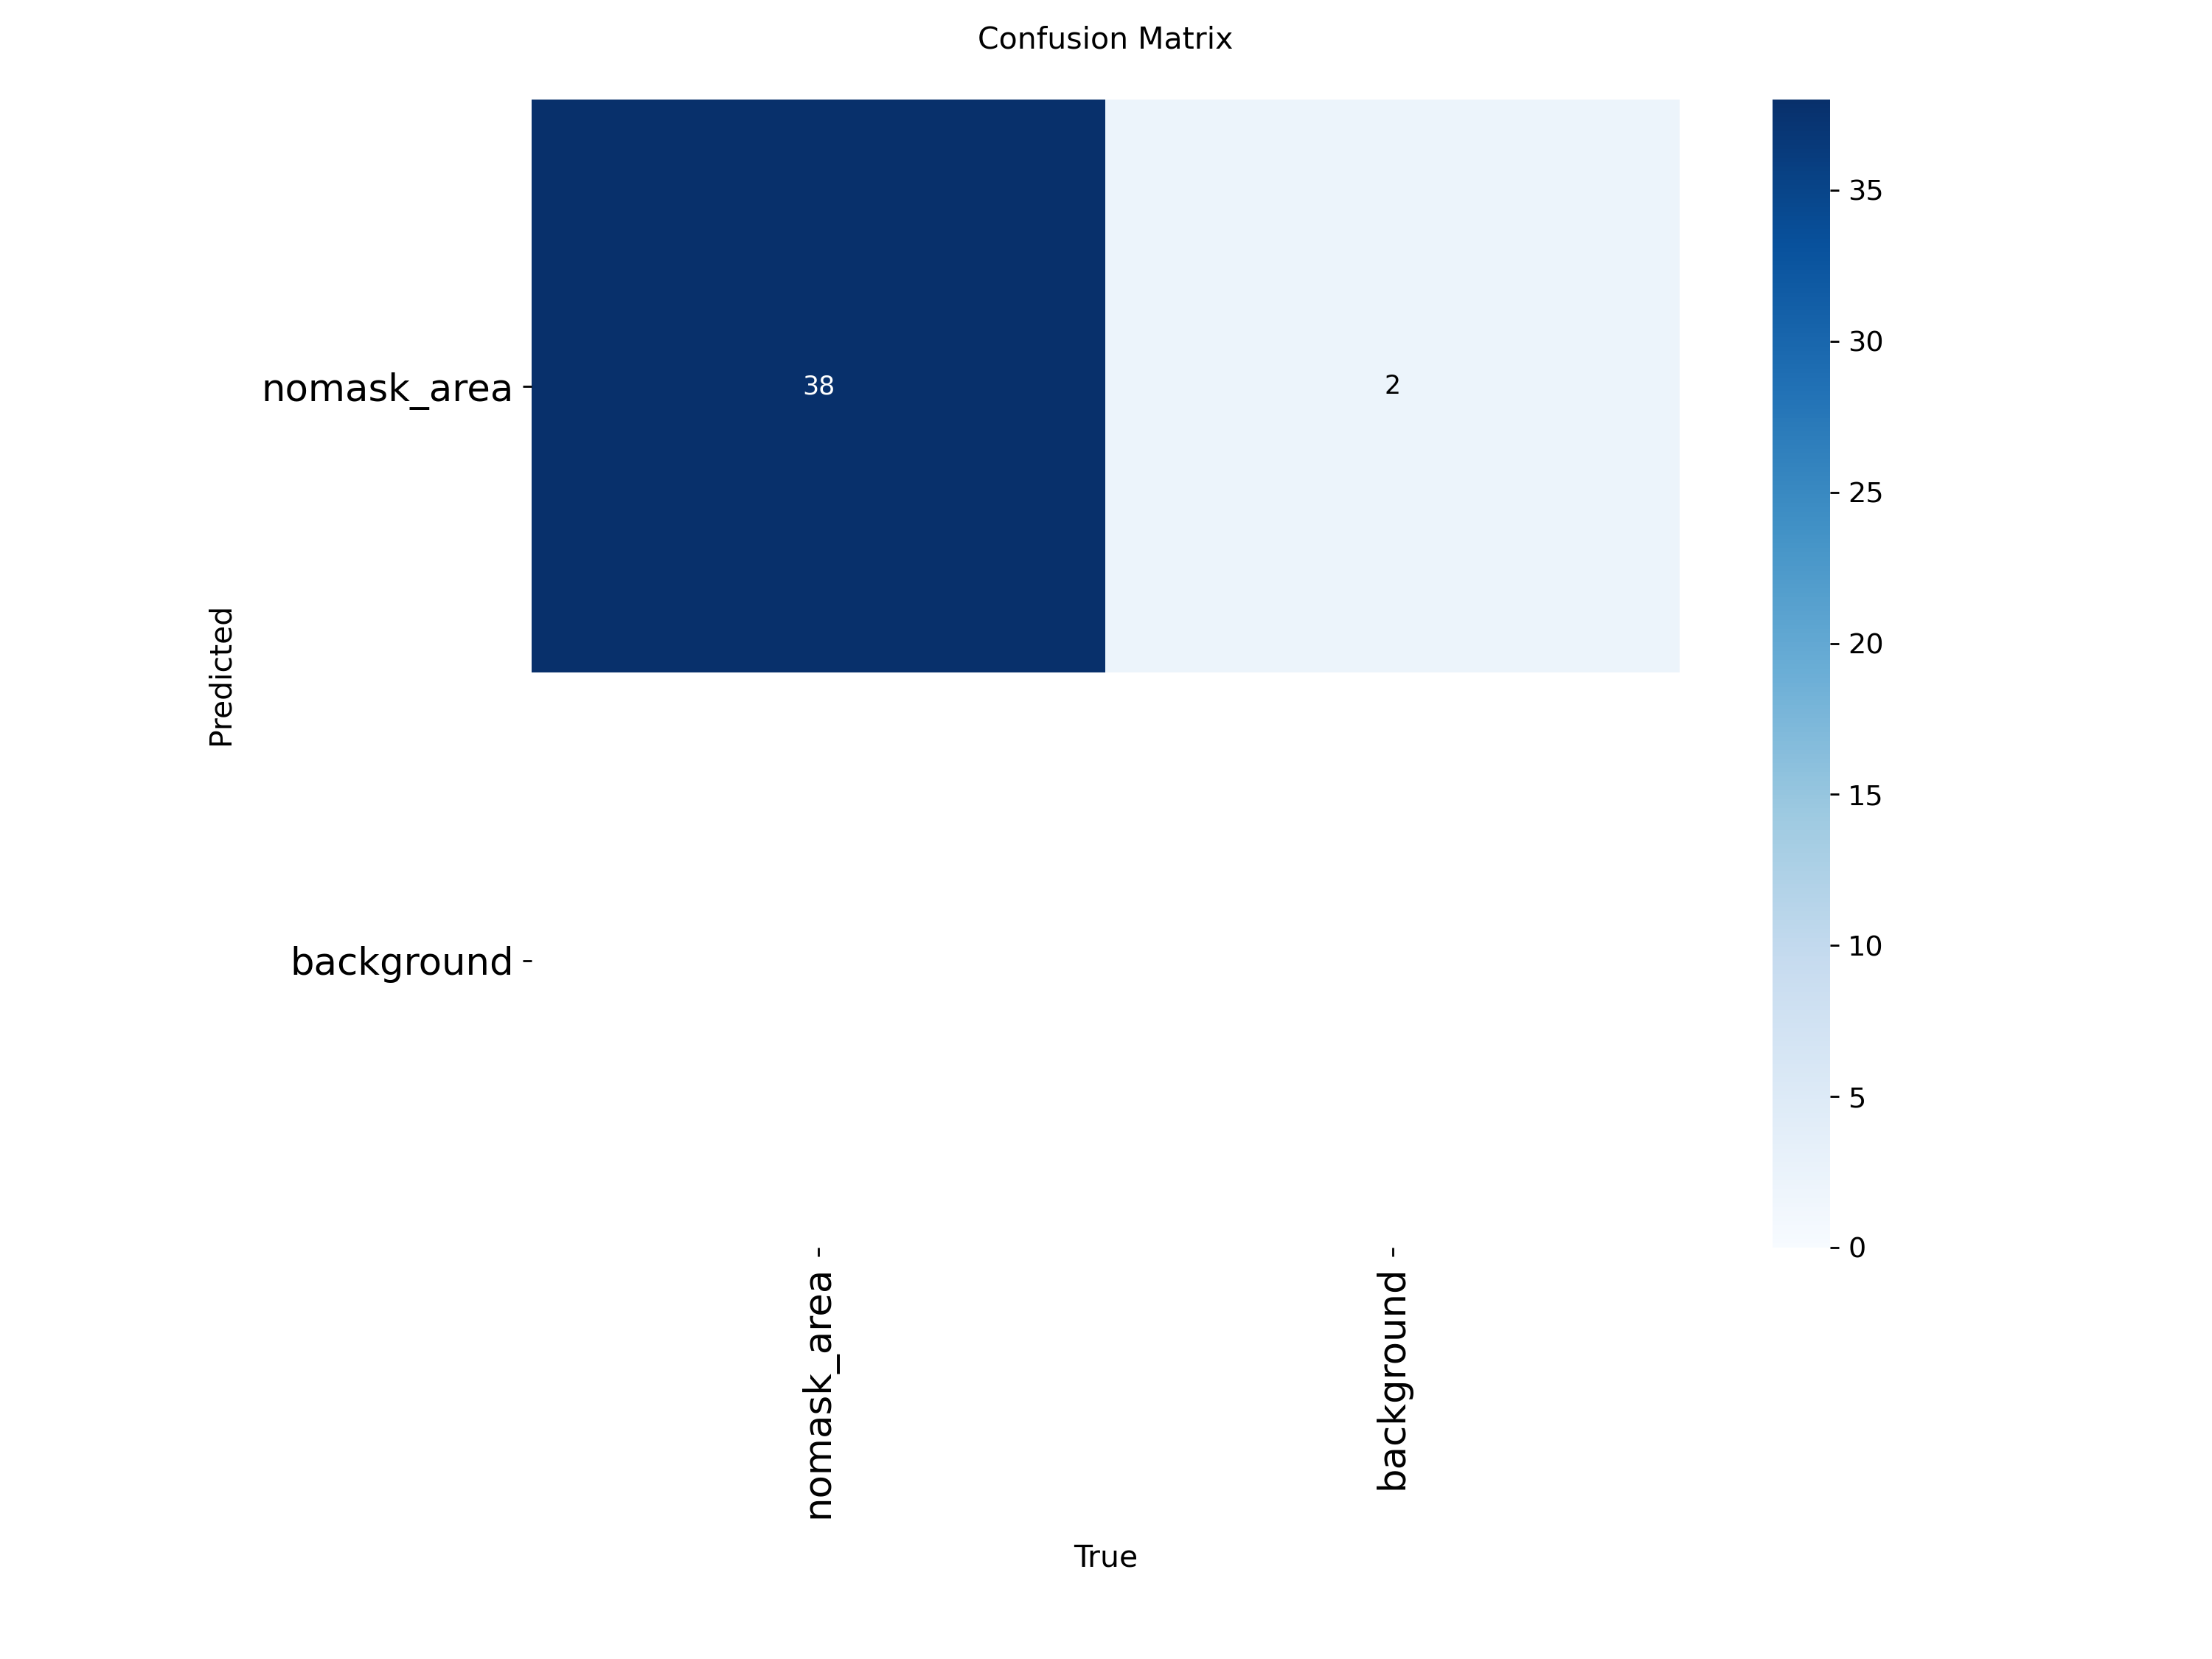

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'./runs/detect/train4/confusion_matrix.png', width=600)

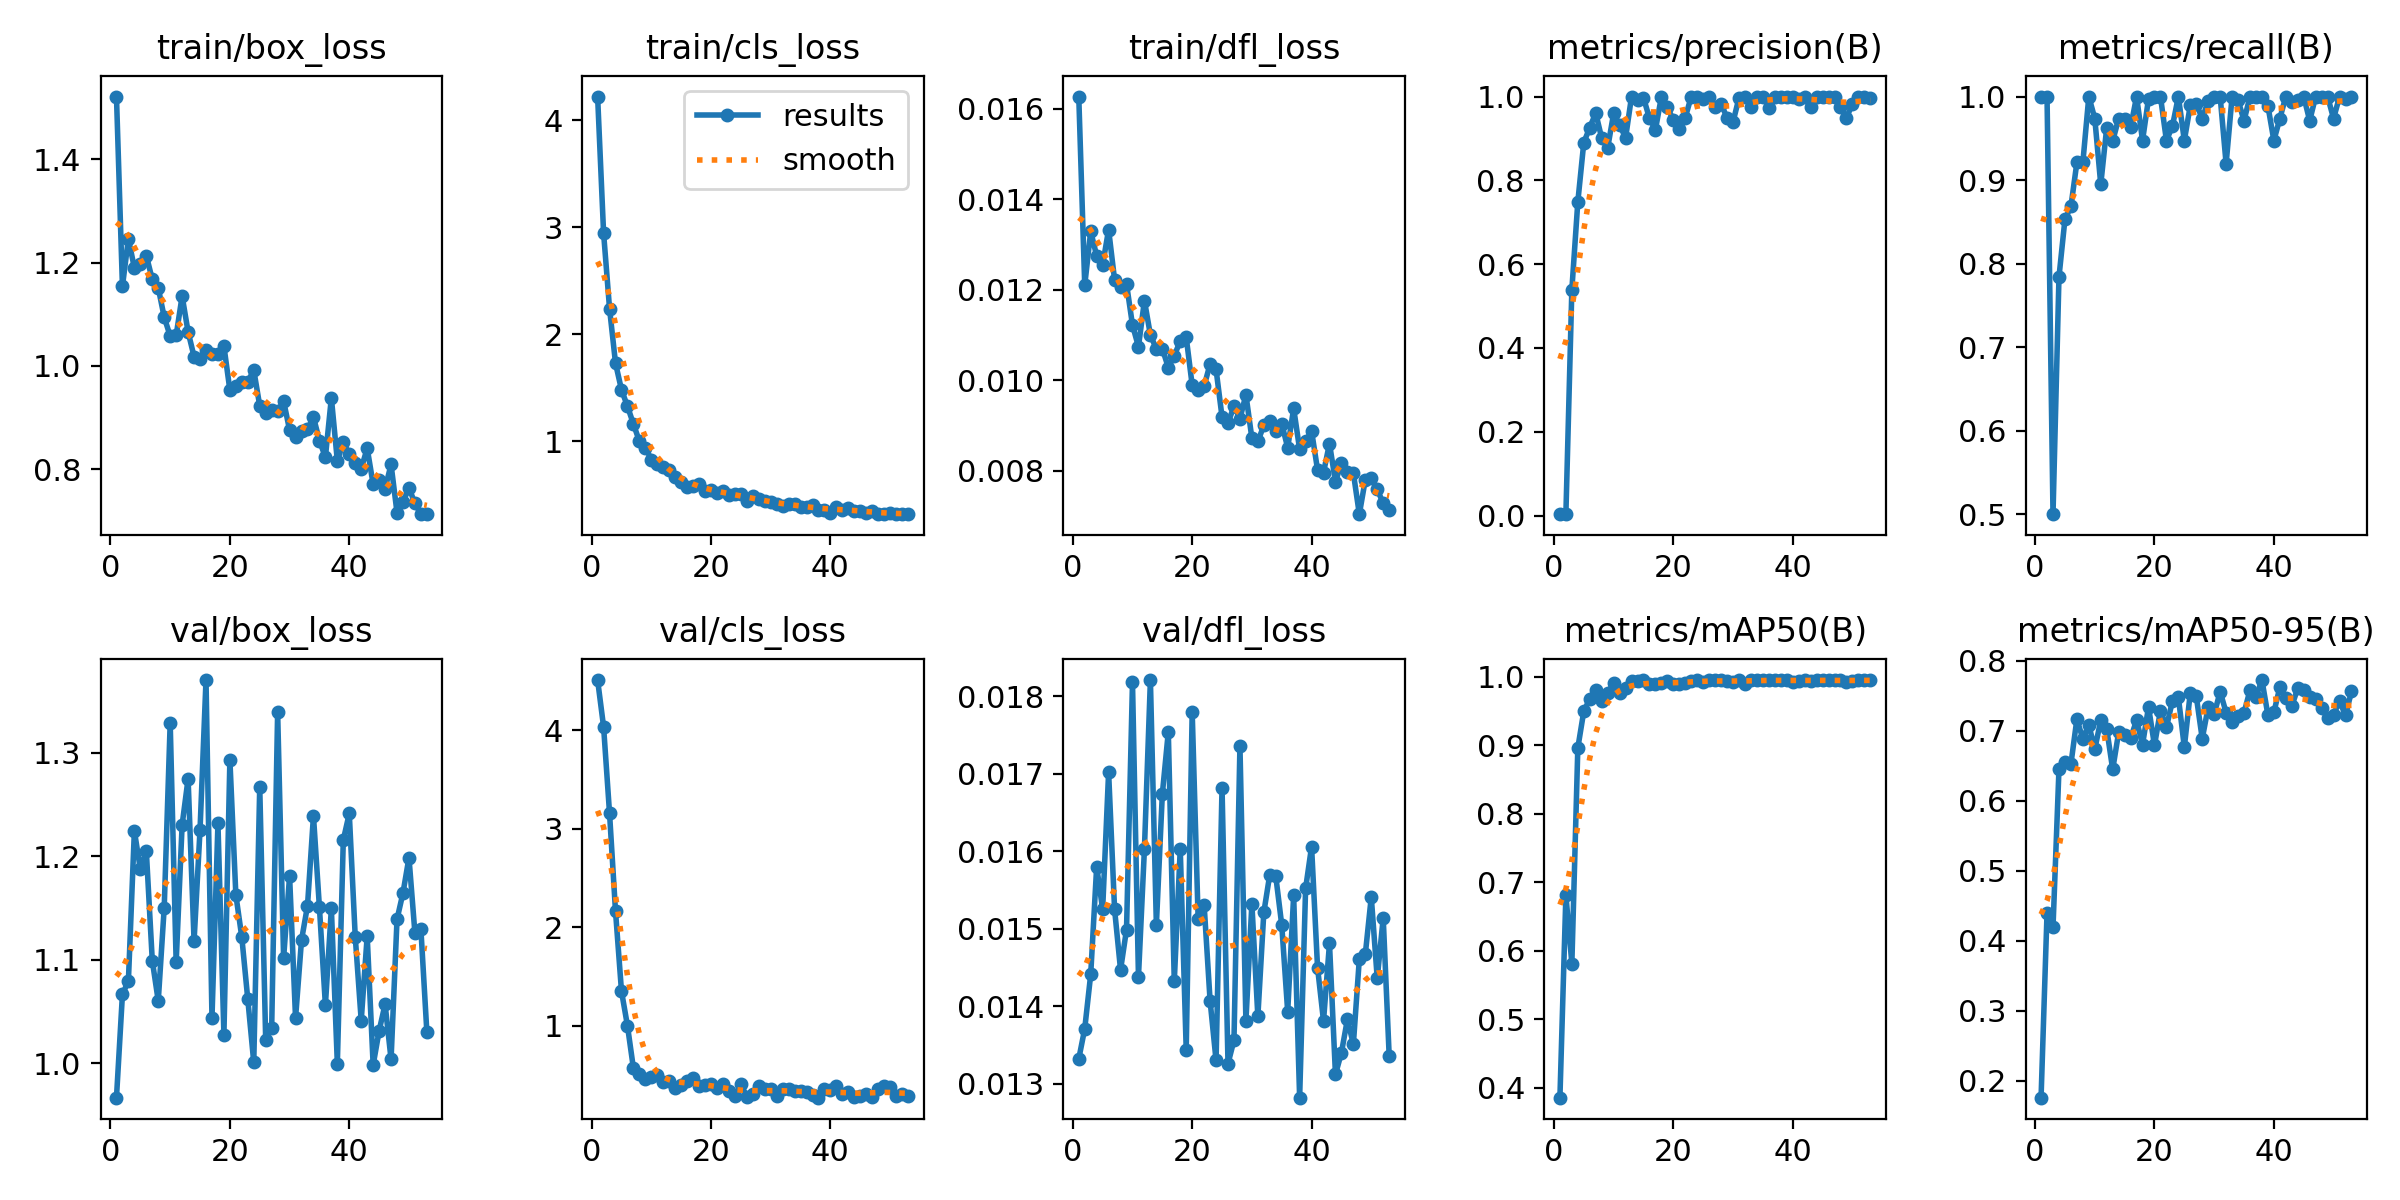

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'./runs/detect/train4/results.png', width=600)

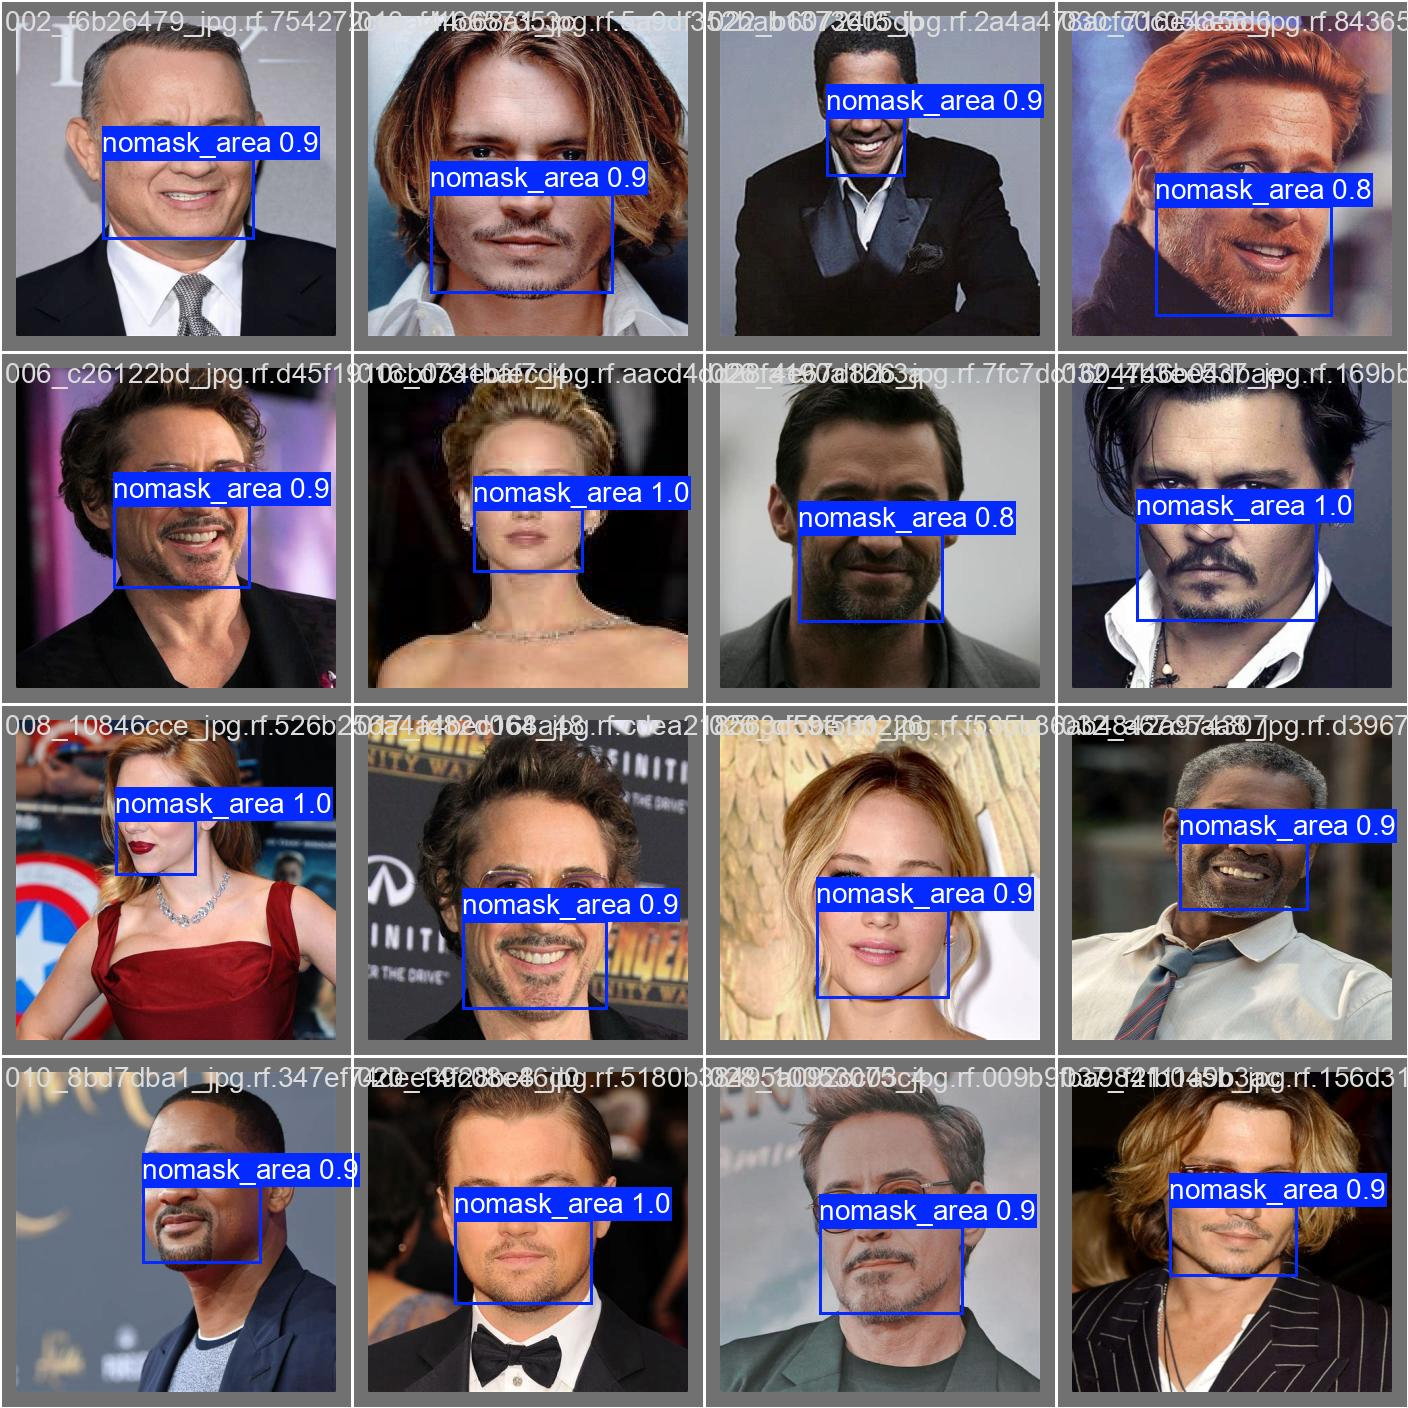

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='./runs/detect/train4/val_batch0_pred.jpg', width=600)

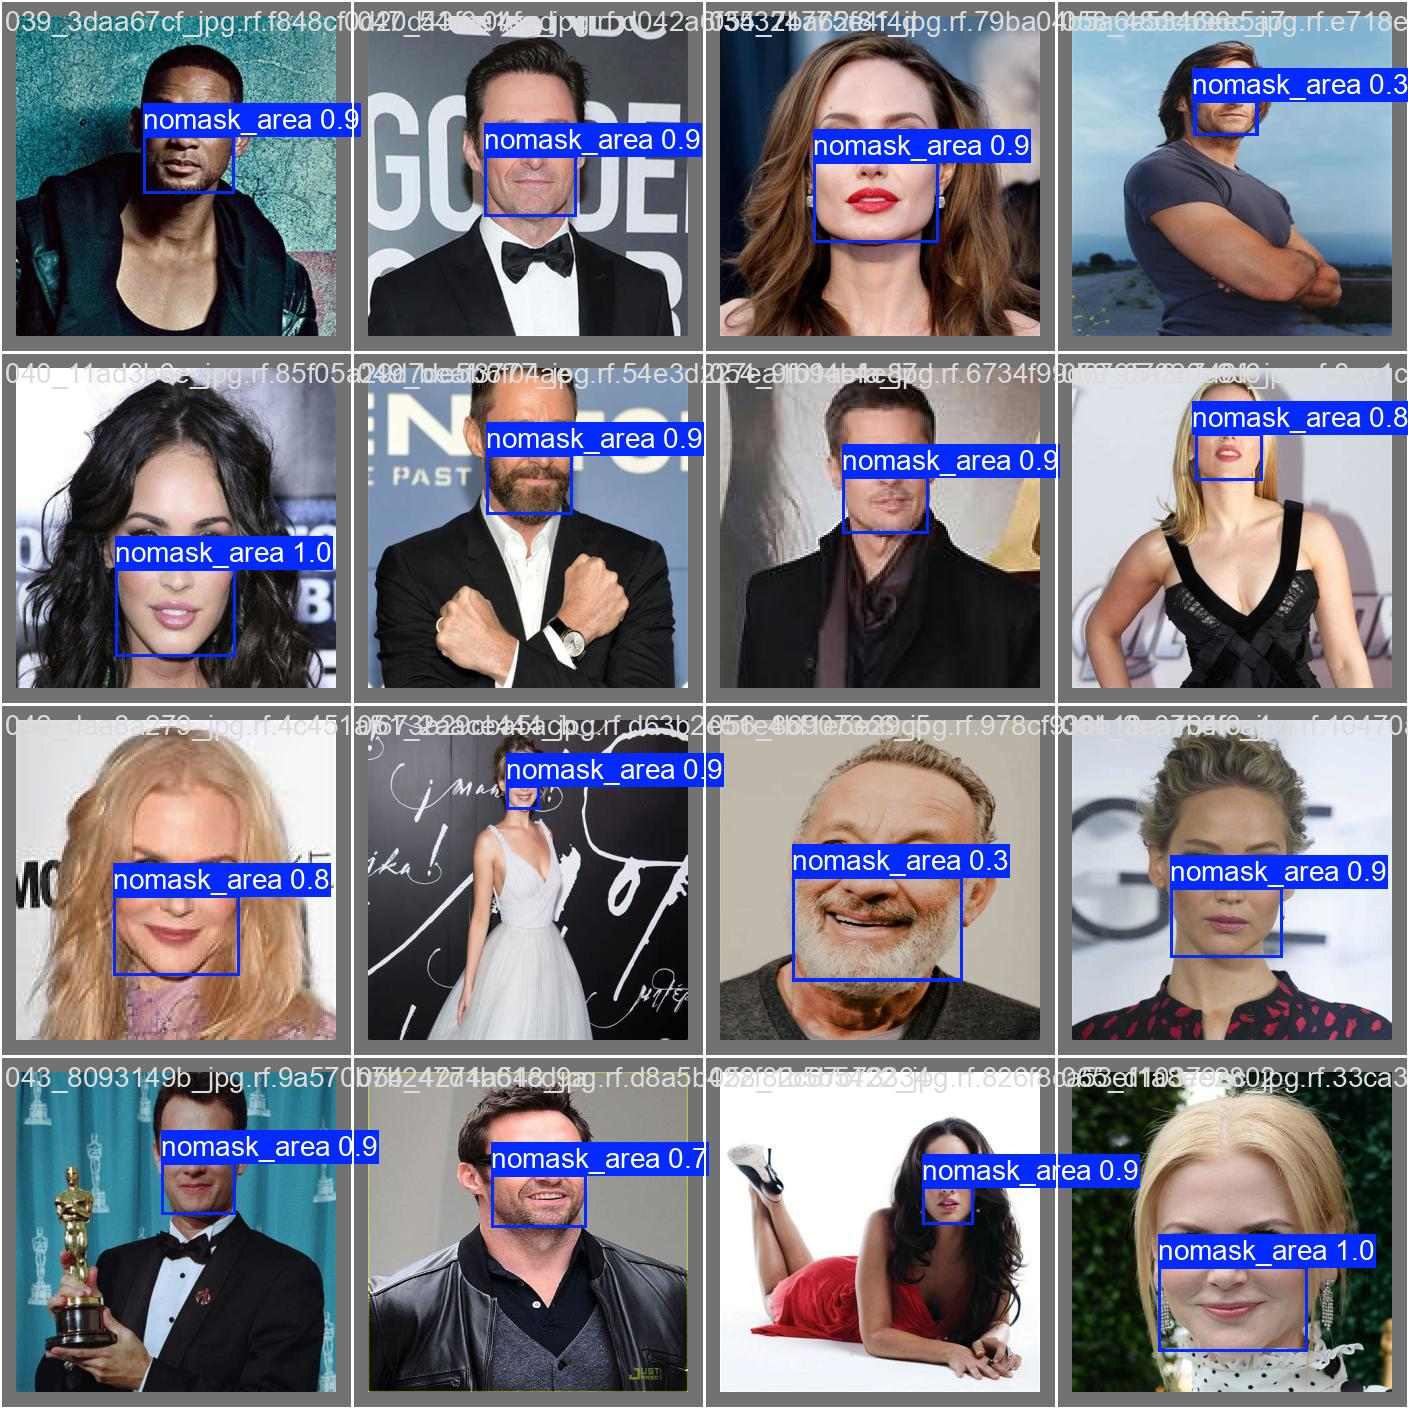

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='./runs/detect/val2/val_batch1_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model="./nomaskarea.pt" conf=0.7 source={dataset.location}/test/images save=True

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs

image 1/13 /content/nomaskarea/face-mask-detection-2/test/images/001_beebcee2_jpg.rf.affa2544abd9e1bdc2fe75384cd4d7dd.jpg: 320x320 1 nomask_area, 13.7ms
image 2/13 /content/nomaskarea/face-mask-detection-2/test/images/009_817304c7_jpg.rf.f5b6e3d4af7592a0771888ab2db98cd9.jpg: 320x320 1 nomask_area, 9.2ms
image 3/13 /content/nomaskarea/face-mask-detection-2/test/images/015_8bac79b5_jpg.rf.7fe57dcfa9e4893616ef883d47c9ece8.jpg: 320x320 1 nomask_area, 8.8ms
image 4/13 /content/nomaskarea/face-mask-detection-2/test/images/023_06dbacd1_jpg.rf.7ab229bfb0349c02311c402ed535b4a9.jpg: 320x320 1 nomask_area, 8.6ms
image 5/13 /content/nomaskarea/face-mask-detection-2/test/images/031_f2f3733f_jpg.rf.5f9961544e9f2b896865c82ec8b412a8.jpg: 320x320 1 nomask_area, 8.4ms
image 6/13 /content/nomaskarea/face-mask-detection-2/test/images/037_62d0